In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data_path = 'healthcare_dataset.csv'
data = pd.read_csv(data_path)
data.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

### Data Cleaning and Normalization

In [ ]:
# 1. Normalize 'Name' column 
data['Name'] = data['Name'].str.title()

# 2. Convert 'Date of Admission' and 'Discharge Date' to datetime format
data['Date of Admission'] = pd.to_datetime(data['Date of Admission'], errors='coerce')
data['Discharge Date'] = pd.to_datetime(data['Discharge Date'], errors='coerce')
data['Days in Hospital'] = (data['Discharge Date'] - data['Date of Admission']).dt.days

# 3. Handle missing or incorrect values (Example: Replace missing 'Billing Amount' with the median)
data['Billing Amount'].fillna(data['Billing Amount'].median(), inplace=True)

# 4. Handle inconsistent values (e.g., Standardize Gender values to 'Male' and 'Female')
data['Gender'] = data['Gender'].str.strip().str.capitalize()

# 5. Detect and remove duplicates
data.drop_duplicates(inplace=True)



# Scatter plot of Age vs Billing Amount
plt.figure(figsize=(8, 6))
plt.scatter(data['Days in Hospital'], data['Billing Amount'], alpha=0.5)
plt.title('Scatter Plot of Days Spent vs Billing Amount')
plt.xlabel('Days Spent')
plt.ylabel('Billing Amount')
plt.show()



In [25]:
# 6. Identify outliers in 'Billing Amount' using IQR (Interquartile Range)
Q1 = data['Billing Amount'].quantile(0.25)
Q3 = data['Billing Amount'].quantile(0.75)
IQR = Q3 - Q1
# Removing outliers outside 1.5*IQR
data_cleaned = data[~((data['Billing Amount'] < (Q1 - 1.5 * IQR)) | (data['Billing Amount'] > (Q3 + 1.5 * IQR)))]

# # 7. Ensure correct data types for numerical columns
# data['Age'] = pd.to_numeric(data['Age'], errors='coerce')
# data['Room Number'] = pd.to_numeric(data['Room Number'], errors='coerce')

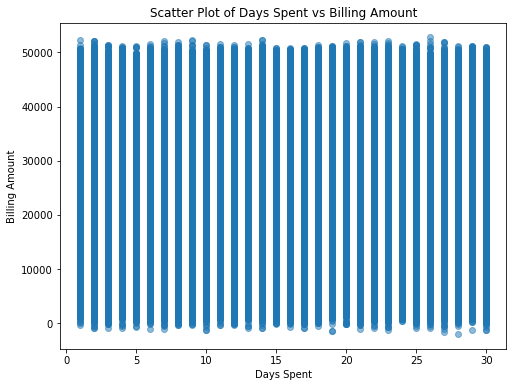

In [26]:
# Plotting the billing amount after removing outliers
plt.figure(figsize=(8, 6))
plt.scatter(data_cleaned['Days in Hospital'], data_cleaned['Billing Amount'], alpha=0.5)
plt.title('Scatter Plot of Days Spent vs Billing Amount')
plt.xlabel('Days Spent')
plt.ylabel('Billing Amount')
plt.show()

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54966 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                54966 non-null  object        
 1   Age                 54966 non-null  int64         
 2   Gender              54966 non-null  object        
 3   Blood Type          54966 non-null  object        
 4   Medical Condition   54966 non-null  object        
 5   Date of Admission   54966 non-null  datetime64[ns]
 6   Doctor              54966 non-null  object        
 7   Hospital            54966 non-null  object        
 8   Insurance Provider  54966 non-null  object        
 9   Billing Amount      54966 non-null  float64       
 10  Room Number         54966 non-null  int64         
 11  Admission Type      54966 non-null  object        
 12  Discharge Date      54966 non-null  datetime64[ns]
 13  Medication          54966 non-null  object    

### There is not much outliers in the dataset which is why there is no difference in the scatterplots but the above information clearly shows that there has been a removal of 534 rows.